# HOMEWORK-2
### RISHAB LOKRAY (9357-3447)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('crab.txt', sep="\t")
data

,Species,FrontalLip,RearWidth,Length,Width,Depth,Male,Female
0,0,20.6,14.4,42.8,46.5,19.6,1,0
1,1,13.3,11.1,27.8,32.3,11.3,1,0
2,0,16.7,14.3,32.3,37.0,14.7,0,1
3,1,9.8,8.9,20.4,23.9,8.8,0,1
4,0,15.6,14.1,31.0,34.5,13.8,0,1
...,...,...,...,...,...,...,...,...
195,1,12.3,11.0,26.8,31.5,11.4,1,0
196,1,12.0,11.1,25.4,29.2,11.0,0,1
197,1,8.8,7.7,18.1,20.8,7.4,1,0
198,1,16.2,15.2,34.5,40.1,13.9,0,1


In [104]:
#SPLITTING TRAINING AND TESTING DATA
training_data = data.loc[0:139]
testing_data = data.loc[140:200]

training_data_t = training_data['Species']
training_data_X = training_data.drop(['Species'],axis=1)

testing_data_t = testing_data['Species']
testing_data_X = testing_data.drop(['Species'],axis=1)

In [19]:
#TRAINING SET
#Calculating Mean and Covar of class_1 class_0

N_class_0,N_class_1 = training_data['Species'].value_counts()

In [21]:
#CALCULATING MEAN
sum_0,sum_1 = 0,0
for i in range(0,140):
    if training_data['Species'].loc[i] == 0:
        sum_0 = sum_0 + training_data.loc[i]
    else:
        sum_1 = sum_1 + training_data.loc[i]
sum_0 = sum_0.drop(['Species']) 
sum_1 = sum_1.drop(['Species'])

Mean_class_0 = sum_0/N_class_0
Mean_class_1 = sum_1/N_class_1

In [24]:
#CALCUALTING COVARIANCE 
temp0 = training_data
temp1 = training_data

for i in range(0,140):
    if temp0['Species'].loc[i] == 1:
        temp0 = temp0.drop(i,axis = 0)

temp0 = temp0.drop(['Species'],axis =1)  
CoVar_class_0 = np.cov(temp0.T) 

for i in range(0,140):
    if temp1['Species'].loc[i] == 0:
        temp1 = temp1.drop(i,axis = 0)
        
temp1 = temp1.drop(['Species'],axis = 1)
CoVar_class_1 = np.cov(temp1.T)

In [25]:
#Prior_Probability

P_C0 = N_class_0/140 
P_C1 = N_class_1/140

In [26]:
from scipy.stats import multivariate_normal

y0 = multivariate_normal.pdf(training_data_X, mean=Mean_class_0, cov=CoVar_class_0) #P(x|C0)
y1 = multivariate_normal.pdf(training_data_X, mean=Mean_class_1, cov=CoVar_class_1) #P(x|C1)

LinAlgError: singular matrix


''' AFTER CAREFUL ANALYSIS OF THE INPUT MATRICES I NOTICED THAT 
FEMALE AND MALE FEATURES CONVEY THE SAME DATA HENCE THE PDF FUNCTION GIVES US 
A SINGULARITY ERROR'''

'''TO FIX THIS I DECIDED TO DROP THE FEMALE FEATURE SET'''


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

In [29]:
training_data = data.loc[0:139]
testing_data = data.loc[140:200]

training_data_t = training_data['Species']
training_data_X = training_data.drop(['Species','Female'],axis=1)

testing_data_t = testing_data['Species']
testing_data_X = testing_data.drop(['Species','Female'],axis=1)

#Dropped Female as Female and Male are simply the negation of each other.

In [30]:
#TRAINING SET
#Calculating Mean and Covar of class_1 class_0

N_class_0,N_class_1 = training_data['Species'].value_counts()


In [31]:
sum_0,sum_1 = 0,0
for i in range(0,140):
    if training_data['Species'].loc[i] == 0:
        sum_0 = sum_0 + training_data.loc[i]
    else:
        sum_1 = sum_1 + training_data.loc[i]
sum_0 = sum_0.drop(['Species','Female']) 
sum_1 = sum_1.drop(['Species','Female'])


In [32]:
Mean_class_0 = sum_0/N_class_0
Mean_class_1 = sum_1/N_class_1

In [33]:
temp0 = training_data
temp1 = training_data

for i in range(0,140):
    if temp0['Species'].loc[i] == 1:
        temp0 = temp0.drop(i,axis = 0)

temp0 = temp0.drop(['Species','Female'],axis =1)  
CoVar_class_0 = np.cov(temp0.T) 

for i in range(0,140):
    if temp1['Species'].loc[i] == 0:
        temp1 = temp1.drop(i,axis = 0)
        
temp1 = temp1.drop(['Species','Female'],axis = 1)
CoVar_class_1 = np.cov(temp1.T)

In [34]:
#Prior_Probability

P_C0 = N_class_0/140 
P_C1 = N_class_1/140

In [35]:
from scipy.stats import multivariate_normal

y0 = multivariate_normal.pdf(training_data_X, mean=Mean_class_0, cov=CoVar_class_0) #P(x|C0)
y1 = multivariate_normal.pdf(training_data_X, mean=Mean_class_1, cov=CoVar_class_1) #P(x|C1)


In [49]:
#Posterior probability 
posterior_0 = (y0*P_C0)/(y1*P_C1 + y0*P_C0)
posterior_1 = (y1*P_C1)/(y1*P_C1 + y0*P_C0)
o_p = posterior_0<posterior_1
o_p == training_data_t

0      True
1      True
2      True
3      True
4      True
       ... 
135    True
136    True
137    True
138    True
139    True
Name: Species, Length: 140, dtype: bool

In [37]:
#Test Data

y0_newPoint = multivariate_normal.pdf(testing_data_X, mean=Mean_class_0, cov=CoVar_class_0) #P(x|C0)

y1_newPoint = multivariate_normal.pdf(testing_data_X, mean=Mean_class_1, cov=CoVar_class_1) #P(x|C1)

In [54]:
posterior_0_test = (y0_newPoint*P_C0)/(y1_newPoint*P_C1 + y0_newPoint*P_C0)
posterior_1_test = (y1_newPoint*P_C1)/(y1_newPoint*P_C1 + y0_newPoint*P_C0)
o_p_test = posterior_0_test<posterior_1_test
o_p_test == testing_data_t

140    True
141    True
142    True
143    True
144    True
145    True
146    True
147    True
148    True
149    True
150    True
151    True
152    True
153    True
154    True
155    True
156    True
157    True
158    True
159    True
160    True
161    True
162    True
163    True
164    True
165    True
166    True
167    True
168    True
169    True
170    True
171    True
172    True
173    True
174    True
175    True
176    True
177    True
178    True
179    True
180    True
181    True
182    True
183    True
184    True
185    True
186    True
187    True
188    True
189    True
190    True
191    True
192    True
193    True
194    True
195    True
196    True
197    True
198    True
199    True
Name: Species, dtype: bool

#### CONFUSION MATRIX FOR TRAINING SET

In [102]:
m = [[0] * 2 for i in range(2)]
for pred, exp in zip(o_p, training_data_t):
    m[pred][exp] += 1
np.array(m)

/Users/rishablokray/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until


array([[72,  0],
       [ 0, 68]])

#### CONFUSION MATRIX FOR TESTING SET

In [101]:
m = [[0] * 2 for i in range(2)]
for pred, exp in zip(o_p_test, testing_data_t):
    m[pred][exp] += 1
np.array(m)

/Users/rishablokray/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until


array([[28,  0],
       [ 0, 32]])

# K-N-N

In [266]:
#Importing libraries and creating training and testing data sets.
from math import sqrt
from sklearn import preprocessing


temp = training_data['Species']
training_data_X = training_data.drop(['Species','Female'],1) 
training_data_X['Species'] = temp




temp2 = testing_data['Species']
testing_data_X = testing_data.drop(['Species','Female'],1) 
testing_data_X['Species'] = temp2



In [261]:
#Using Library to Normalize data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(training_data_X)

X_train = scaler.transform(training_data_X)
X_test = scaler.transform(testing_data_X)

In [324]:
# Calculate the Euclidean distance between two input vectors(Row1 is from the testing set and Row2 is from trainig set)
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locating the  similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
 
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction
 
def crossvalidation(nn,predictions):
    # predict the label
    for row in X_test:
        predictions.append(predict_classification(X_train, row, nn))
    return predictions

def calc_confMatrix(nn,predictions):
    m = [[0] * 2 for i in range(2)]
    for pred, exp in zip(predictions, testing_data_t):
        m[int(pred)][exp] += 1
    print("Confusion matrix for n =",nn)
    con_mat = np.array(m)
    print(con_mat)
    print("Accuracy of Classifier for n =",nn)
    total_accuracy = (con_mat[0, 0] + con_mat[1, 1]) / float(np.sum(con_mat))
    graph.append(total_accuracy)
    print(total_accuracy)
    
    
graph = list()
for nn in range(1,15):    
    predictions = list()
    predictions = crossvalidation(nn,predictions)
    predictions = np.array(predictions)
    predictions[predictions<0] =0 #Denormalizing the predictions to 0 and 1
    predictions[predictions>0] =1 #Denormalizing the predictions to 0 and 1
    predictions = list(predictions)
    calc_confMatrix(nn,predictions)



    



Confusion matrix for n = 1
[[25  4]
 [ 3 28]]
Accuracy of Classifier for n = 1
0.8833333333333333
Confusion matrix for n = 2
[[25  7]
 [ 3 25]]
Accuracy of Classifier for n = 2
0.8333333333333334
Confusion matrix for n = 3
[[21  4]
 [ 7 28]]
Accuracy of Classifier for n = 3
0.8166666666666667
Confusion matrix for n = 4
[[25  9]
 [ 3 23]]
Accuracy of Classifier for n = 4
0.8
Confusion matrix for n = 5
[[23  6]
 [ 5 26]]
Accuracy of Classifier for n = 5
0.8166666666666667
Confusion matrix for n = 6
[[25  7]
 [ 3 25]]
Accuracy of Classifier for n = 6
0.8333333333333334
Confusion matrix for n = 7
[[19  4]
 [ 9 28]]
Accuracy of Classifier for n = 7
0.7833333333333333
Confusion matrix for n = 8
[[22  8]
 [ 6 24]]
Accuracy of Classifier for n = 8
0.7666666666666667
Confusion matrix for n = 9
[[14  7]
 [14 25]]
Accuracy of Classifier for n = 9
0.65
Confusion matrix for n = 10
[[20  9]
 [ 8 23]]
Accuracy of Classifier for n = 10
0.7166666666666667
Confusion matrix for n = 11
[[16  8]
 [12 24]]


#### Graph plot as we increase the values of knn neighbours

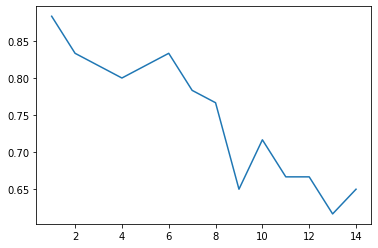

In [326]:
plt.plot(range(1,15),graph)

#### Confusion matrix for the testing set N=6

In [329]:
'''Confusion matrix for n = 6
   [[25  7]
   [ 3 25]]
   Accuracy of Classifier for n = 6
   0.8333333333333334 '''

'Confusion matrix for n = 6\n   [[25  7]\n   [ 3 25]]\n   Accuracy of Classifier for n = 6\n   0.8333333333333334 '

AS THE ACCURACY IS HIGH FOR N = 6 WE CHOOSE KNN with N = 6

#### I would prefer the KNN classifier over the probability generative model 
#### as in the probablility model we have to assume a gaussian pdf distribution 
#### and the pdfs of the two classes is very less even though the posteriori is predicted perfectly 
#### this can lead to false positives. While a sytem is expected to let the user know that it is not sure of the output 
#### rather than give a false prediction.